In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix, csc_matrix, bsr_matrix


# Sparse formats

Example from notes CSR

In [33]:

val =  np.array([1, 2, 9, 8, 2, -1, 4, 5, 2, 7])
col_ind = np.array([1, 2, 4, 3, 4, 1, 2, 4, 2, 3])
col_ind = col_ind - 1
row_ptr = np.array([1, 4, 6, 9, 11] ) # last ptr is ghost row, nnz vals
row_ptr = row_ptr - 1

m = csr_matrix((val, col_ind, row_ptr))
m.toarray()

array([[ 1,  2,  0,  9],
       [ 0,  0,  8,  2],
       [-1,  4,  0,  5],
       [ 0,  2,  7,  0]])

With an empty row

In [34]:
val =  np.array([1, 2, 9, 8, 2, -1, 4, 5, 2, 7])
col_ind = np.array([1, 2, 4, 3, 4, 1, 2, 4, 2, 3])
col_ind = col_ind - 1
row_ptr = np.array([1, 4, 6, 6, 9, 11] ) # last ptr is ghost row, nnz vals
row_ptr = row_ptr - 1

m = csr_matrix((val, col_ind, row_ptr))
m.toarray()

array([[ 1,  2,  0,  9],
       [ 0,  0,  8,  2],
       [ 0,  0,  0,  0],
       [-1,  4,  0,  5],
       [ 0,  2,  7,  0]])

With an empty column

In [35]:
val =  np.array([1, 2, 9, 8, 2, -1, 4, 5, 2, 7])
col_ind = np.array([1, 1, 4, 3, 4, 1, 3, 4, 4, 3])
col_ind = col_ind - 1
row_ptr = np.array([1, 4, 6, 9, 11] ) # last ptr is ghost row, nnz vals
row_ptr = row_ptr - 1

m = csr_matrix((val, col_ind, row_ptr))
m.toarray()

array([[ 3,  0,  0,  9],
       [ 0,  0,  8,  2],
       [-1,  0,  4,  5],
       [ 0,  0,  7,  2]])

Example from notes CSC

In [36]:
val =  np.array( [2,2,5,3,1,4])
row_ind = np.array([1,4,3,1,2,1])
row_ind = row_ind - 1
col_ptr = np.array([1,3,4,6,7]  )
col_ptr = col_ptr - 1

m = csc_matrix((val, row_ind, col_ptr))
m.toarray()

array([[2, 0, 3, 4],
       [0, 0, 1, 0],
       [0, 5, 0, 0],
       [2, 0, 0, 0]])

With an empty column

In [37]:
val =  np.array( [2,2,5,3,1,4])
row_ind = np.array([1,4,3,1,2,1])
row_ind = row_ind - 1
col_ptr = np.array([1,3,4,4, 6,7]  )
col_ptr = col_ptr - 1

m = csc_matrix((val, row_ind, col_ptr))
m.toarray()

array([[2, 0, 0, 3, 4],
       [0, 0, 0, 1, 0],
       [0, 5, 0, 0, 0],
       [2, 0, 0, 0, 0]])

Example from notes, BSR

In [38]:
val =  np.array( [[[2,0],[3,1]], [[4,7],[3,1]], [[4,5],[3,0]],[[1,0],[0,1]]] )
row_ind = np.array([1,2,3,1])
row_ind = row_ind - 1
col_ptr = np.array([1,2,4,5]  )
col_ptr = col_ptr - 1

m = bsr_matrix((val, row_ind, col_ptr))
m.toarray()

array([[2, 0, 0, 0, 0, 0],
       [3, 1, 0, 0, 0, 0],
       [0, 0, 4, 7, 4, 5],
       [0, 0, 3, 1, 3, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [39]:
indptr = np.array([0, 2, 3, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6]).repeat(4).reshape(6, 2, 2)
bsr_matrix((data,indices,indptr), shape=(6, 6)).toarray()

array([[1, 1, 0, 0, 2, 2],
       [1, 1, 0, 0, 2, 2],
       [0, 0, 0, 0, 3, 3],
       [0, 0, 0, 0, 3, 3],
       [4, 4, 5, 5, 6, 6],
       [4, 4, 5, 5, 6, 6]])

#  Recommender Example

In [41]:
data = {"Life is Beautiful":np.array([2.5, 3.0, 2.5, 'nan', 3, 3, 'nan'], dtype=np.double), "Seven Samurai": np.array([3.5, 3.5, 3.0, 3.5, 4, 4, 4.5], dtype=np.double),
        "Joker": np.array([3.0,1.5,'nan',3,2,'nan','nan'], dtype=np.double),  "Schindler's List": np.array([3.5,5,3.5,4.0,3,5,4], dtype=np.double), 
        "The Pianist": np.array([3,3,4,4.5,3,3,'nan'], dtype=np.double), "City Of God":np.array([2.5,3.5,'nan',2.5,2.0,3.5,1], dtype=np.double)}
users = ["Lee", "Sofia", "Miley", "Justina", "Donald", "Mickey", "Tristan"]
films = ["Life is Beautiful", "Seven Samurai","Joker","Schindler's List","The Pianist","City Of God"]
film_labels = ["Life", "Seven", "Joker", "List", "Pianist", "City"]
film_dict = dict(zip(films, film_labels))
df = pd.DataFrame(data, index = users)
df

,Life is Beautiful,Seven Samurai,Joker,Schindler's List,The Pianist,City Of God
Lee,2.5,3.5,3.0,3.5,3.0,2.5
Sofia,3.0,3.5,1.5,5.0,3.0,3.5
Miley,2.5,3.0,NaN,3.5,4.0,NaN
Justina,NaN,3.5,3.0,4.0,4.5,2.5
Donald,3.0,4.0,2.0,3.0,3.0,2.0
Mickey,3.0,4.0,NaN,5.0,3.0,3.5
Tristan,NaN,4.5,NaN,4.0,NaN,1.0


In [42]:
#routine to plot sparse vector points. iterates through vector, if either one or the other are NaN, then does not plot that point. 
%matplotlib inline
def make_mask(x,y, labels):
    plot_point=[]
    for i in range(len(x)):
        if (np.isnan(x[i]) or np.isnan(y[i])):
            continue
        else:
            plot_point.append(labels[i])
    return plot_point



# Visualisation of users in film space

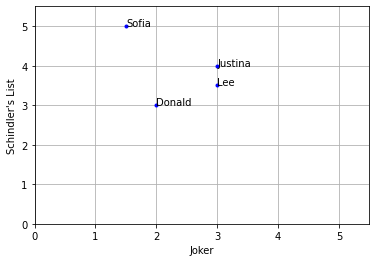

In [43]:
x = "Joker"
y = "Schindler's List"
plot_mask = make_mask(df[x],df[y], users )
x_vals = df[x].loc[plot_mask]
y_vals = df[y].loc[plot_mask]
fig, ax = plt.subplots()
ax.plot(x_vals,y_vals, 'b.')
plt.grid()
plt.axis([0,5.5,0,5.5])
plt.xlabel(x)
plt.ylabel(y)
for user in plot_mask:
    ax.annotate(user, (x_vals[user], y_vals[user]))

# Plotting correlations between users using pearson similarity

In [44]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
def pearson(x, y):
    x_bar =  np.mean(x)
    y_bar = np.mean(y)
    top = np.dot( (x-x_bar), (y-y_bar) )
    bottom = np.sqrt( sum((x - x_bar)**2)) * np.sqrt(sum((y - y_bar)**2) )
#     print(top, "/", bottom)
    return top/bottom

Pearson Correlation =  0.8934051474415642


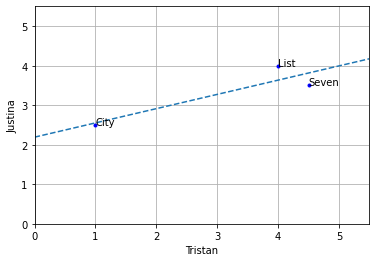

In [46]:
x = "Tristan"
y = "Justina"
film_mask = make_mask(df.loc[x], df.loc[y], films)
x_vals = df[film_mask].loc[x]
y_vals = df[film_mask].loc[y]
fig, ax = plt.subplots()
ax.plot(x_vals,y_vals, 'b.')
plt.grid()
plt.axis([0,5.5,0,5.5])
plt.xlabel(x)
plt.ylabel(y)
for film in film_mask:
    ax.annotate(film_dict[film], (x_vals[film], y_vals[film]))
p = pearson(x_vals, y_vals)
print("Pearson Correlation = ", p)
coeff = np.polyfit(x_vals,y_vals,1)
abline(coeff[0], coeff[1])

# Ranking users by similarity

In [47]:
import numpy.linalg as la
def euclid_dist(x, y):
    tot = 0
    for i in range(len(x)):
        diff = (x[i] - y[i])**2
        tot +=diff
    return np.sqrt(tot)

def euclid_sim(x,y):
    dist = euclid_dist(x,y)
    return 1/(1+dist)

def cos_sim(x,y):
    sim = np.dot(x,y)/(np.sqrt(sum(x**2))*np.sqrt(sum(y**2)))
    return sim

def rank(user1, df, sim=pearson, n = None, print_out=True):
    users = list(df.index)
    if not n:
        n = len(users)-1
    us = users.copy()
    us.remove(user1)
    similarities=[]
    fs = list(df.columns)
    
    for user2 in us:
        film_mask = make_mask(df.loc[user1], df.loc[user2], fs)
        x_vals = df[film_mask].loc[user1]
        y_vals = df[film_mask].loc[user2]
        s = sim(x_vals, y_vals)
        similarities.append(s)
        
    sim_dict = dict(zip(us, similarities))
    top_match = []
    if print_out:
        print("Top %d closest to %s \n" % (n, user1))
    for key, value in sorted(sim_dict.items(), key=lambda item: (item[1], item[0]), reverse=True):
        top_match.append(((key), value))
        if print_out:
            print(key, value)
    if print_out:
        print("\n")
    return top_match


In [49]:
u1 = "Lee"
print("Using cosine similarity metric \n")
top_matches = rank(u1, df, sim=cos_sim) 

Using cosine similarity metric 

Top 6 closest to Lee 

Mickey 0.9912758269345802
Justina 0.986586764527925
Miley 0.9859858031677182
Donald 0.9818313856641693
Sofia 0.9606463013980241
Tristan 0.9528927449621697




In [50]:
print("Using Pearson similarity metric \n")
top_matches = rank(u1,  df) 

Using Pearson similarity metric 

Top 6 closest to Lee 

Tristan 0.9912407071619304
Mickey 0.747017880833996
Donald 0.5940885257860046
Justina 0.5669467095138409
Miley 0.40451991747794525
Sofia 0.39605901719066977




# Item - Item Similarity

In [52]:
rank("Schindler's List", df.T)

Top 5 closest to Schindler's List 

City Of God 0.657951694959769
Life is Beautiful 0.48795003647426655
Seven Samurai 0.1118033988749895
The Pianist -0.1798471947990542
Joker -0.42289003161103106




[('City Of God', 0.657951694959769),
 ('Life is Beautiful', 0.48795003647426655),
 ('Seven Samurai', 0.1118033988749895),
 ('The Pianist', -0.1798471947990542),
 ('Joker', -0.42289003161103106)]

# Precomputing Item Similarity

In [53]:
def calc_similar_items(df, similarity=pearson, n = 2):
    t_df = df.T
    items = list(t_df.index)
    ret={}
    for item in items:
        r = rank(item, t_df, sim=similarity, print_out=False)
        ret[item] = r[:n]
    return ret

In [54]:
calc_similar_items(df)

{'Life is Beautiful': [('Seven Samurai', 0.7637626158259732),
  ("Schindler's List", 0.48795003647426655)],
 'Seven Samurai': [('Life is Beautiful', 0.7637626158259732),
  ("Schindler's List", 0.1118033988749895)],
 'Joker': [('The Pianist', 0.5555555555555556),
  ('Seven Samurai', -0.3333333333333333)],
 "Schindler's List": [('City Of God', 0.657951694959769),
  ('Life is Beautiful', 0.48795003647426655)],
 'The Pianist': [('Joker', 0.5555555555555556),
  ("Schindler's List", -0.1798471947990542)],
 'City Of God': [("Schindler's List", 0.657951694959769),
  ('Life is Beautiful', 0.3333333333333333)]}

# Item - based recommendation

In [55]:
def get_recommended_items(user, df, similarity = pearson, limit=6):
    """
    returns predicted ratings for user for each of the films not rated so far
    """
    films = df.columns
    sim_dict = calc_similar_items(df, similarity=similarity, n=6)
    rate_dict={}
    for film in df.columns:
        if np.isnan(df[film].loc[user]):
            sim_sum = 0
            rate_sim_sum = 0
            for sim_film in sim_dict[film]:
                if not np.isnan(df[sim_film[0]].loc[user]):
                    sim = sim_film[1]
                    rate = df[sim_film[0]].loc[user]
                    rate_sim_sum += sim*rate
                    sim_sum += sim
            est_rating = rate_sim_sum/sim_sum
            rate_dict[est_rating] = film
    rates = list(rate_dict.keys())
    if limit>len(rates):
        limit=len(rates)
    rates.sort(reverse=True)
    rates = rates[:limit]
    for rate in rates:
        print(rate_dict[rate], "%0.2f" %rate)



In [56]:
get_recommended_items("Tristan", df, similarity=euclid_sim) 

The Pianist 3.17
Joker 2.94
Life is Beautiful 2.87


In [57]:
get_recommended_items("Tristan", df, similarity=pearson) 

Life is Beautiful 3.61
The Pianist 3.53
Joker 2.96


In [58]:
get_recommended_items("Tristan", df, similarity=cos_sim) 

Joker 3.19
The Pianist 3.18
Life is Beautiful 3.18


In [60]:
get_recommendation("Tristan", df)

The Pianist 3.35
Life is Beautiful 2.83
Joker 2.53
